### **The aim of this assignment is to build clustering methods on credit bank data, and analyse the clusters.**




# 1. Loading the data


In [1]:
!pip install prince
import numpy as np
import sklearn
from sklearn import datasets
import pandas as pd
import seaborn as sn
import prince
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [2]:
dataset = pd.read_csv('german_credit_data.csv')

In [3]:
dataset.columns

Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose'],
      dtype='object')

In [4]:
dataset.drop(columns='Unnamed: 0', inplace=True)

In [5]:
dataset.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


In [6]:
dataset.dtypes

Age                  int64
Sex                 object
Job                  int64
Housing             object
Saving accounts     object
Checking account    object
Credit amount        int64
Duration             int64
Purpose             object
dtype: object

In [7]:
for column in dataset:
    print (dataset[column].value_counts())

27    51
26    50
23    48
24    44
28    43
25    41
35    40
30    40
36    39
31    38
29    37
32    34
33    33
34    32
37    29
22    27
40    25
38    24
42    22
39    21
46    18
41    17
43    17
44    17
47    17
45    15
21    14
49    14
20    14
48    12
50    12
54    10
52     9
57     9
55     8
63     8
51     8
53     7
61     7
60     6
58     5
64     5
65     5
66     5
74     4
67     3
68     3
56     3
59     3
75     2
62     2
19     2
70     1
Name: Age, dtype: int64
male      690
female    310
Name: Sex, dtype: int64
2    630
1    200
3    148
0     22
Name: Job, dtype: int64
own     713
rent    179
free    108
Name: Housing, dtype: int64
little        603
moderate      103
quite rich     63
rich           48
Name: Saving accounts, dtype: int64
little      274
moderate    269
rich         63
Name: Checking account, dtype: int64
1258    3
1478    3
1275    3
1393    3
1262    3
       ..
1345    1
1343    1
7485    1
3345    1
2051    1
Name: Credit amount,

In [8]:
dataset.shape

(1000, 9)

# 2. Anlaysis of missing values

In [9]:
dataset.isnull().sum(axis=0)

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64

In [10]:
dataset_nan = dataset[dataset[['Saving accounts','Checking account']].isnull().sum(axis=1) > 0] 
dataset_nan.shape

(478, 9)

There are only two features that register `NaN` values : `Saving accounts` and `Checking account`. However, according the shape of the subdataset of row containing null values (see above), it is not often that they are simultaneously missing (99 rows out of 478). We will analyse the null correlation later on.

In [11]:
dataset_nan.head(20)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
5,35,male,1,free,NaN,NaN,9055,36,education
6,53,male,2,own,quite rich,NaN,2835,24,furniture/equipment
8,61,male,1,own,rich,NaN,3059,12,radio/TV
16,53,male,2,own,NaN,NaN,2424,24,radio/TV
17,25,male,2,own,NaN,little,8072,30,business
19,31,male,2,own,quite rich,NaN,3430,24,radio/TV
20,48,male,2,own,little,NaN,2134,9,car
24,26,male,2,own,NaN,NaN,2069,10,furniture/equipment


In [12]:
import missingno as msno

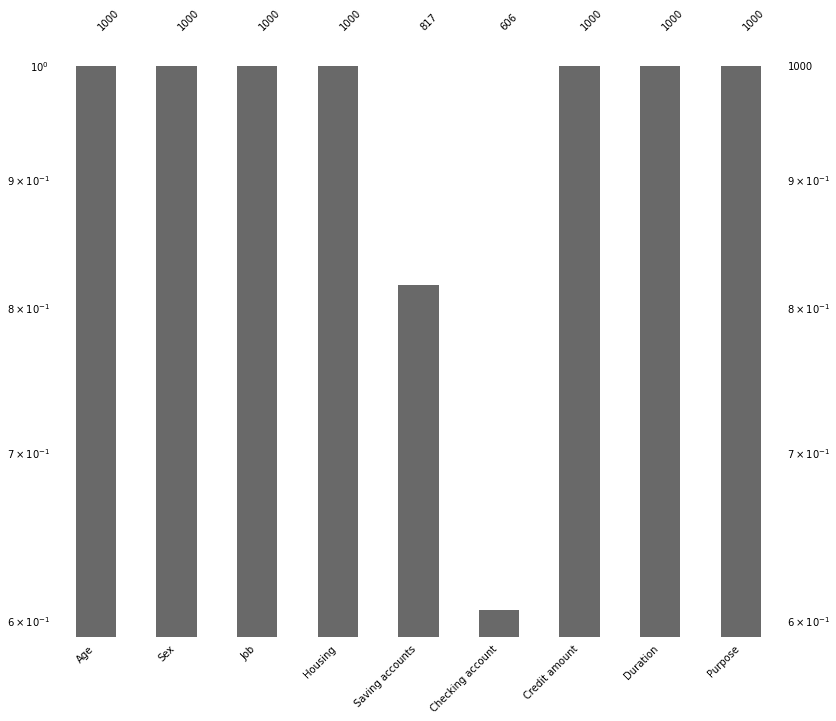

In [13]:
msno.bar(dataset.sample(1000),log=True,figsize=(13, 11),fontsize=10)

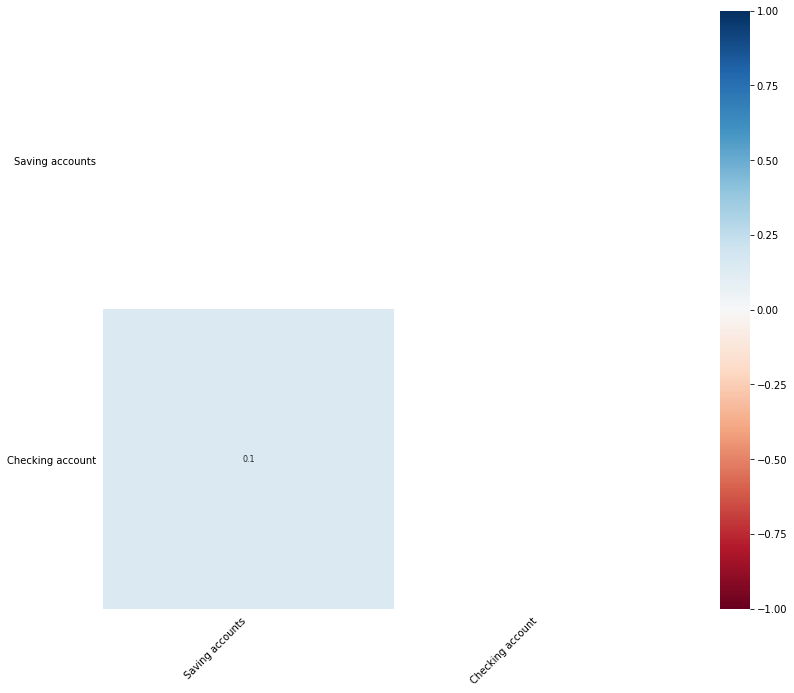

In [14]:
msno.heatmap(dataset,figsize=(13, 11),fontsize=10)

As we suspected, there is no real impact of the appearance or not of the `Saving accounts` value on the appearance or not of the `Checking account` value.

# 3. Univariate analysis 

We want to take a closer look at the distribution of the different features, and see if there are any particular patterns.


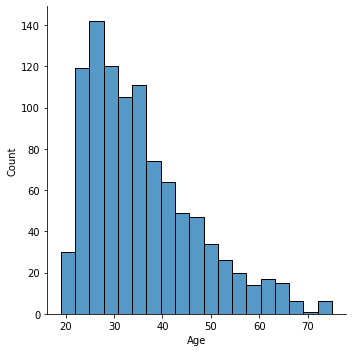

In [15]:
sn.displot(dataset.Age)

Most clients with a credit from the bank are between the age 25 and 38. This is often a crucial time in the life of an individual. People want to have families, they want to buy houses, cars, or make investements for the coming years. There is a drop around the age of 45/50 because usually people are already settled by then. 

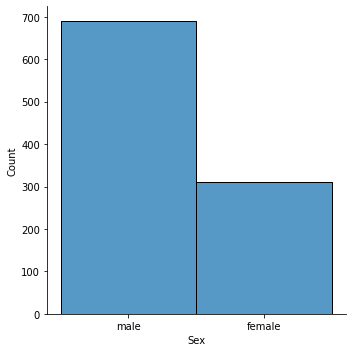

In [16]:
sn.displot(dataset.Sex)

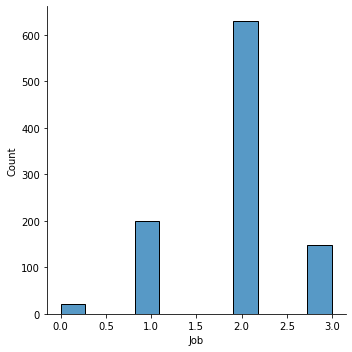

In [17]:
sn.displot(dataset.Job)

Without proper documentation it is difficult to say what type of job correponds to the different values, however since `2` is the main value for `Job`, we may assume that it refers to jobs with a secure and medium/high salary. Other job types could be entrepreneur or self-employed, or even retired. Those can be seen as a source of risk for the bank.

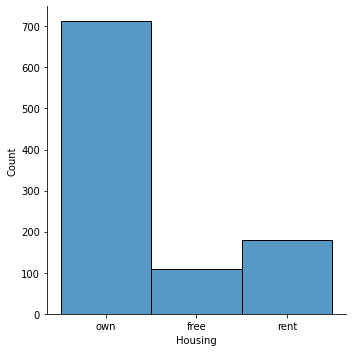

In [18]:
sn.displot(dataset.Housing)

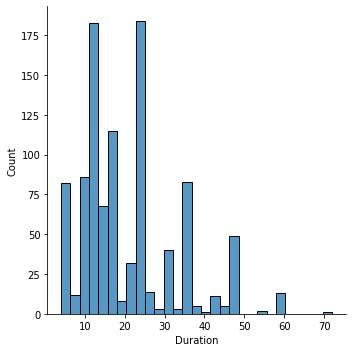

In [19]:
sn.displot(dataset.Duration)

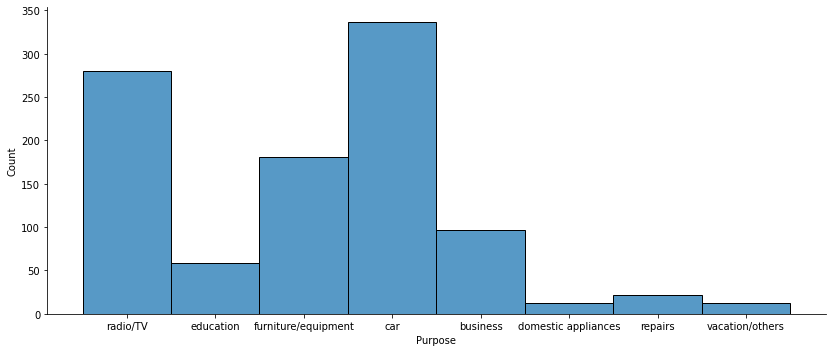

In [20]:
sn.displot(dataset.Purpose, aspect=7/3)

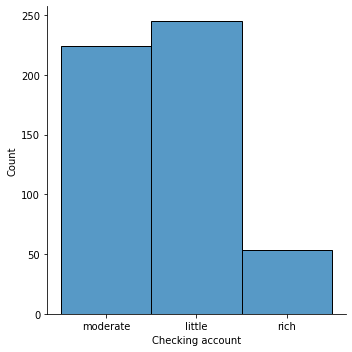

In [21]:
sn.displot((dataset.drop(dataset_nan.index))['Checking account'])

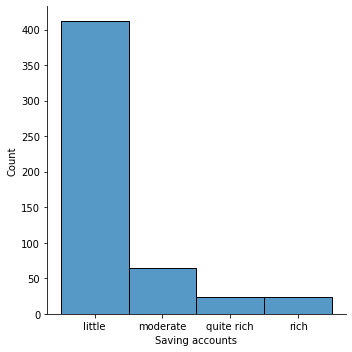

In [22]:
sn.displot((dataset.drop(dataset_nan.index))['Saving accounts'])

In [23]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0
Job,1000.0,1.904,0.653614,0.0,2.0,2.0,2.00,3.0
Credit amount,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
Duration,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0


It seems that the feature `Credit amount` may contain some interesting outliers. The boxplot below helps to see this, but we can also see that the maximum (`18424`) is way above the third quartile (`3972`). We notice, in the distribution plot, the long tail. It is unlikely that these observations are errors, but most likely perculiar profiles. The feature `Credit amount` might be essential for clustering later on, because it might help create clusters for very specific profiles. A deeper analysis of outliers is required however.

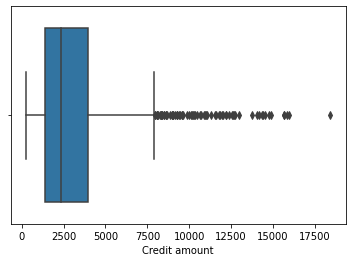

In [24]:
sn.boxplot(x=dataset['Credit amount'])

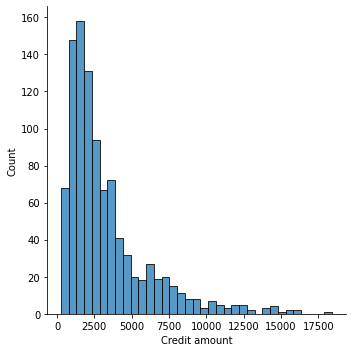

In [25]:
sn.displot(dataset['Credit amount'])

Most credit amount are smaller than 4000, which is related to the distribution of the purpose of the credit. Often it is for cars, furnitures etc.

In [26]:
dataset.describe(include=['O']).transpose()

,count,unique,top,freq
Sex,1000,2,male,690
Housing,1000,3,own,713
Saving accounts,817,4,little,603
Checking account,606,3,little,274
Purpose,1000,8,car,337


# 4. Multivariate analysis

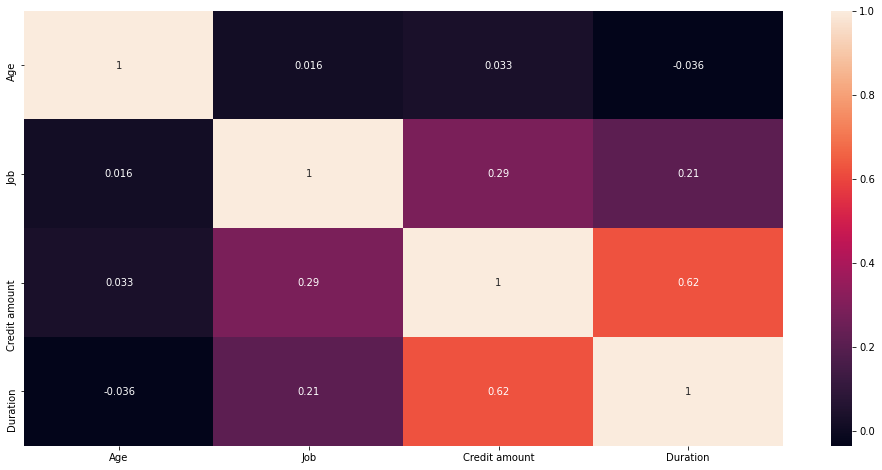

In [27]:
corrMatrix = dataset.corr()
plt.figure(figsize = (17,8))
sn.heatmap(corrMatrix, annot=True)
plt.show()

The correlation between the credit amount and the duration of the loan is very strong, if the credit amount is quite large we can assume that the duration may be longer. There is also a noticable correlation between the job of the person getting a credit and the duration and credit amount. We might expect someone with a high salary to pay back more quickly than someone with a lower salary, for the same credit amount. The credit amount will also be lower for someone with a lower salary, since banks won't take the risk to grant a credit to someone they're not absolutely sure will pay back in time.

In [28]:
pd.crosstab(dataset['Saving accounts'],dataset['Purpose'])

Purpose,business,car,domestic appliances,education,furniture/equipment,radio/TV,repairs,vacation/others
Saving accounts,,,,,,,,
little,56,188,6,34,128,169,14,8
moderate,17,39,1,5,9,27,3,2
quite rich,4,18,2,3,12,23,1,0
rich,6,18,0,2,11,9,2,0


Most clients have low saving accounts and use that credit for cars, radio/TV, furnitures, or all of them at the same time.

In [29]:
pd.crosstab(dataset['Checking account'],dataset['Housing'])

Housing,free,own,rent
Checking account,,,
little,39,170,65
moderate,29,192,48
rich,8,47,8


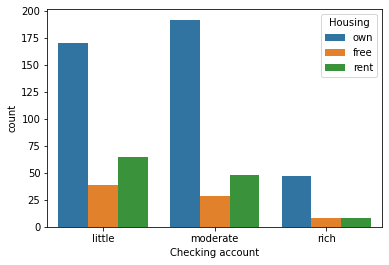

In [30]:
sn.countplot(x='Checking account', hue='Housing', data=dataset)

In [31]:
pd.crosstab(dataset['Saving accounts'],dataset['Housing'])

Housing,free,own,rent
Saving accounts,,,
little,67,430,106
moderate,10,71,22
quite rich,6,45,12
rich,2,37,9


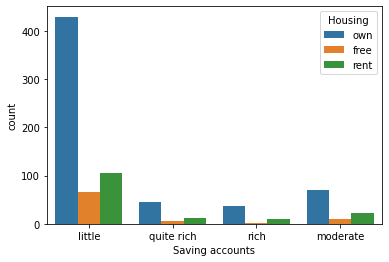

In [32]:
sn.countplot(x='Saving accounts', hue='Housing', data=dataset)

In [33]:
pd.crosstab(dataset['Saving accounts'],dataset['Checking account'])

Checking account,little,moderate,rich
Saving accounts,,,
little,219,152,41
moderate,12,47,5
quite rich,8,11,4
rich,6,14,3


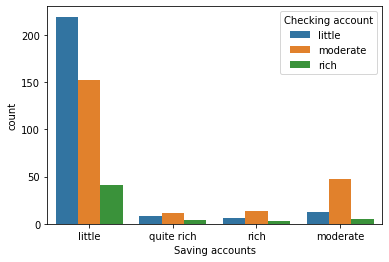

In [34]:
sn.countplot(x='Saving accounts', hue='Checking account', data=dataset)

# 5. Prepare for clustering

In [35]:
dataset_clust = dataset.copy()

In [36]:
dataset_clust

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car
...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,NaN,1736,12,furniture/equipment
996,40,male,3,own,little,little,3857,30,car
997,38,male,2,own,little,NaN,804,12,radio/TV
998,23,male,2,free,little,little,1845,45,radio/TV


In [37]:
dataset_clust.isnull().sum(axis=0)

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64

We want to fill the null values for the features `Checking account` and `Saving accounts`. We will use the values found in similar rows, on the basis of a subset (composed of `'Job','Housing','Duration'`), to do so.

In [38]:
columns_subset = ['Job','Housing','Duration']

In [39]:
dataset_clust['Checking account'] = dataset_clust.groupby(columns_subset)['Checking account'].apply(lambda x: x.ffill().bfill())

In [40]:
dataset_clust.isnull().sum(axis=0)

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account     24
Credit amount         0
Duration              0
Purpose               0
dtype: int64

In [41]:
dataset_clust['Saving accounts'] = dataset_clust.groupby(columns_subset)['Saving accounts'].apply(lambda x: x.ffill().bfill())

In [42]:
dataset_clust.isnull().sum(axis=0)

Age                  0
Sex                  0
Job                  0
Housing              0
Saving accounts     17
Checking account    24
Credit amount        0
Duration             0
Purpose              0
dtype: int64

For the remaining null values, we can replace them with the mode.

In [43]:
dataset_clust['Saving accounts'] = dataset_clust['Saving accounts'].fillna((dataset_clust['Saving accounts'].mode()[0]))

In [44]:
dataset_clust['Checking account'] = dataset_clust['Checking account'].fillna((dataset_clust['Checking account'].mode()[0]))

In [45]:
dataset_clust.isnull().sum(axis=0)

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
dtype: int64

# 6. Clustering

## 6.1 Dummy + K-Means

In [46]:
dataset_dumm = pd.get_dummies(dataset_clust, drop_first=True)

In [47]:
def elbow(df):
  sse = {}
  for k in range(1, 10):
      kmeans = KMeans(n_clusters=k, max_iter=1000, init='k-means++').fit(df)
      df['clusters'] = kmeans.labels_
      sse[k] = kmeans.inertia_ 
  plt.figure()
  plt.plot(list(sse.keys()), list(sse.values()))
  plt.xlabel('Number of clusters')
  plt.ylabel('SSE')
  plt.show()


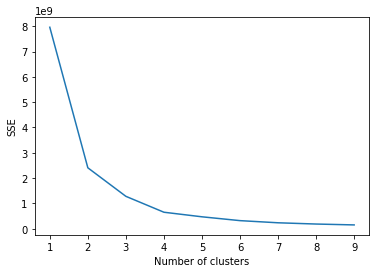

In [48]:
elbow(dataset_dumm)

## 6.2 FAMD + K-means

In [49]:
dataset_famd = dataset_clust.copy()

In [50]:
famd = prince.FAMD(n_components=2)
principalDf_famd = famd.fit_transform(dataset_famd)
principalDf_famd

,0,1
0,-0.749927,1.964545
1,1.088938,-1.453542
2,-0.830024,1.248967
3,1.958085,0.346260
4,1.094278,1.420855
...,...,...
995,-1.340318,-0.730972
996,0.986199,0.485223
997,-0.777391,0.653007
998,0.950252,-0.096321


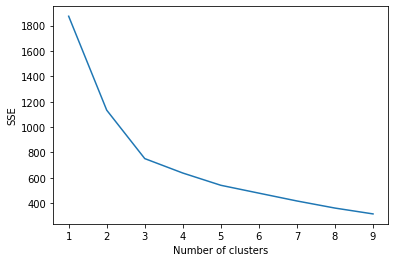

In [51]:
elbow(principalDf_famd)

## 6.3 PCA + MCA + K-means

In [52]:
dataset_mca = dataset_clust.loc[:,dataset_clust.dtypes==np.object]

In [53]:
dataset_mca

,Sex,Housing,Saving accounts,Checking account,Purpose
0,male,own,little,little,radio/TV
1,female,own,little,moderate,radio/TV
2,male,own,little,little,education
3,male,free,little,little,furniture/equipment
4,male,free,little,little,car
...,...,...,...,...,...
995,female,own,little,little,furniture/equipment
996,male,own,little,little,car
997,male,own,little,little,radio/TV
998,male,free,little,little,radio/TV


In [54]:
mca = prince.MCA(n_components=2)
mca = mca.fit(dataset_mca)
principalDf_mca = mca.transform(dataset_mca)
principalDf_mca

,0,1
0,-0.171683,-0.096502
1,0.011818,-0.645598
2,-0.055175,0.615986
3,0.157747,1.067836
4,-0.287156,1.281627
...,...,...
995,0.856603,0.023168
996,-0.084785,0.401293
997,-0.171683,-0.096502
998,-0.374054,0.783832


In [55]:
dataset_pca = dataset_clust.loc[:,dataset_clust.dtypes==np.int]

In [56]:
dataset_pca

,Age,Job,Credit amount,Duration
0,67,2,1169,6
1,22,2,5951,48
2,49,1,2096,12
3,45,2,7882,42
4,53,2,4870,24
...,...,...,...,...
995,31,1,1736,12
996,40,3,3857,30
997,38,2,804,12
998,23,2,1845,45


In [57]:
pca = prince.PCA(n_components=2)
pca = pca.fit(dataset_pca)
principalDf_pca = pca.transform(dataset_pca)
principalDf_pca

,0,1
0,-1.194542,2.859247
1,2.100553,-1.366294
2,-1.301225,1.091077
3,2.246763,0.698941
4,0.604513,1.520616
...,...,...
995,-1.394977,-0.477952
996,1.304913,0.491853
997,-0.980085,0.283619
998,0.988894,-1.285326


In [58]:
principalDf_pca_mca = principalDf_pca.add(principalDf_mca, fill_value=0)

In [59]:
principalDf_pca_mca

,0,1
0,-1.366225,2.762745
1,2.112370,-2.011892
2,-1.356400,1.707063
3,2.404510,1.766778
4,0.317357,2.802244
...,...,...
995,-0.538374,-0.454785
996,1.220127,0.893146
997,-1.151769,0.187117
998,0.614840,-0.501494


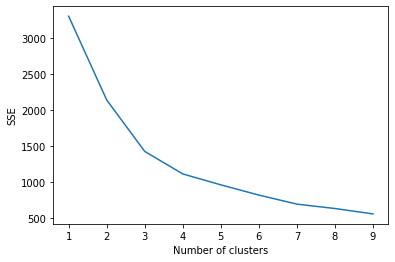

In [60]:
elbow(principalDf_pca_mca)

# 7. K-means (4 clusters)

After computing the optimal number of clusters with the Elbow algorithm for the three different methods above, we can conclude that the best common optimal number of clusters is 4.

We can now analyse in detail the K-means clustering for that number of clusters.

## 7.1 Dummies

In [61]:
kmeans_dumm = KMeans(n_clusters=4, max_iter=1000, init='k-means++').fit(dataset_dumm)
dataset_dumm['clusters'] = kmeans_dumm.labels_

dataset_dumm.head(15)

,Age,Job,Credit amount,Duration,Sex_male,Housing_own,Housing_rent,Saving accounts_moderate,Saving accounts_quite rich,Saving accounts_rich,Checking account_moderate,Checking account_rich,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,clusters
0,67,2,1169,6,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,22,2,5951,48,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,3
2,49,1,2096,12,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,45,2,7882,42,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,3
4,53,2,4870,24,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2
5,35,1,9055,36,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,3
6,53,2,2835,24,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,2
7,35,3,6948,36,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,3
8,61,1,3059,12,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,2
9,28,3,5234,30,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,2


## 7.2 FAMD

In [62]:
dataset_famd = dataset_clust.copy()
famd = prince.FAMD(n_components=2)
principalDf_famd = famd.fit_transform(dataset_famd)
principalDf_famd

,0,1
0,-0.755045,1.970020
1,1.088979,-1.406680
2,-0.831851,1.311029
3,1.970614,0.442073
4,1.089359,1.437252
...,...,...
995,-1.325444,-0.614955
996,0.975569,0.416989
997,-0.788404,0.625353
998,0.937543,-0.089114


In [63]:
kmeans_famd = KMeans(n_clusters=4, max_iter=1000, init='k-means++').fit(principalDf_famd)
principalDf_famd['clusters'] = kmeans_famd.labels_

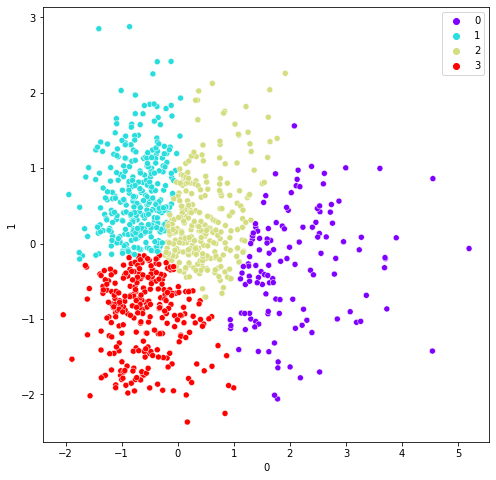

In [64]:
plt.figure(figsize=(8,8))
sn.scatterplot(x=principalDf_famd.iloc[:,0], y=principalDf_famd.iloc[:,1], hue=kmeans_famd.labels_, palette='rainbow')

In [65]:
principalDf_famd['clusters'].describe()

count    1000.00000
mean        1.69600
std         1.01124
min         0.00000
25%         1.00000
50%         2.00000
75%         3.00000
max         3.00000
Name: clusters, dtype: float64

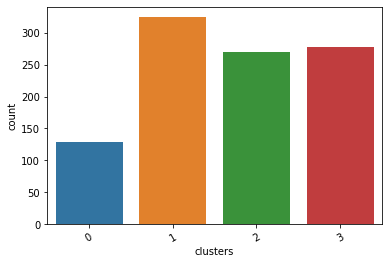

In [66]:
sn.countplot(data = principalDf_famd, x = 'clusters')
plt.xticks(rotation=30)
plt.show()

## 7.3 PCA + MCA

In [67]:
dataset_mca = dataset_clust.loc[:,dataset_clust.dtypes==np.object]
mca = prince.MCA(n_components=2)
mca = mca.fit(dataset_mca)
principalDf_mca = mca.transform(dataset_mca)
principalDf_mca

,0,1
0,-0.172396,-0.095904
1,0.012074,-0.646300
2,-0.058187,0.605906
3,0.161397,1.066556
4,-0.285313,1.280980
...,...,...
995,0.858363,0.022834
996,-0.085627,0.398343
997,-0.172396,-0.095904
998,-0.372082,0.786733


In [68]:
dataset_pca = dataset_clust.loc[:,dataset_clust.dtypes==np.int]
pca = prince.PCA(n_components=2)
pca = pca.fit(dataset_pca)
principalDf_pca = pca.transform(dataset_pca)
principalDf_pca

,0,1
0,-1.194542,2.859247
1,2.100553,-1.366294
2,-1.301225,1.091077
3,2.246763,0.698941
4,0.604513,1.520616
...,...,...
995,-1.394977,-0.477952
996,1.304913,0.491853
997,-0.980085,0.283619
998,0.988894,-1.285326


In [69]:
principalDf_pca_mca = principalDf_pca.add(principalDf_mca, fill_value=0)
principalDf_pca_mca 

,0,1
0,-1.366938,2.763342
1,2.112626,-2.012594
2,-1.359411,1.696984
3,2.408160,1.765497
4,0.319200,2.801596
...,...,...
995,-0.536614,-0.455118
996,1.219286,0.890195
997,-1.152481,0.187714
998,0.616812,-0.498593


In [70]:
kmeans_pca_mca = KMeans(n_clusters=4, max_iter=1000, init='k-means++').fit(principalDf_pca_mca)
principalDf_pca_mca['clusters'] = kmeans_pca_mca.labels_

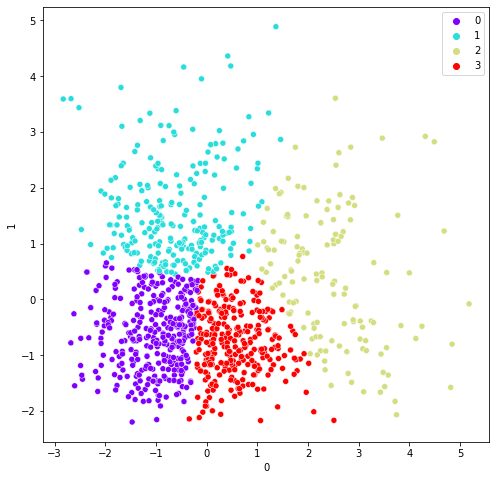

In [71]:
plt.figure(figsize=(8,8))
sn.scatterplot(x=principalDf_pca_mca.iloc[:,0], y=principalDf_pca_mca.iloc[:,1], hue=kmeans_pca_mca.labels_, palette='rainbow')

In [72]:
principalDf_pca_mca['clusters'].describe()

count    1000.0000
mean        1.3900
std         1.2245
min         0.0000
25%         0.0000
50%         1.0000
75%         3.0000
max         3.0000
Name: clusters, dtype: float64

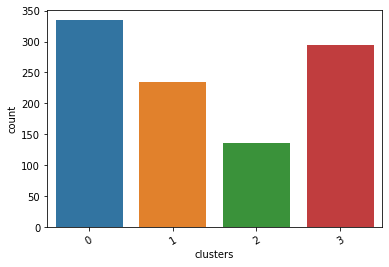

In [73]:
sn.countplot(data = principalDf_pca_mca, x = 'clusters')
plt.xticks(rotation=30)
plt.show()

We can see that both the FAMD and PCA+MCA clusterings have similar clusters, which is normal because FAMD is a way of combining PCA and MCA. The clusters `0`,`1` and `2` all have between 250 and 350 elements, whereas the cluster `3` contains only 100 elements. In order to better understand the clusters, we can focus on the observations.

In [90]:
dataset_clust['clusters_famd'] = principalDf_famd['clusters']
dataset_clust['clusters_pca_mca'] = principalDf_pca_mca['clusters']
dataset_clust['clusters_dummies'] = dataset_dumm['clusters']

In [91]:
dataset_clust

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,clusters_famd,clusters_pca_mca,clusters_dummies
0,67,male,2,own,little,little,1169,6,radio/TV,1,1,0
1,22,female,2,own,little,moderate,5951,48,radio/TV,0,3,3
2,49,male,1,own,little,little,2096,12,education,1,1,0
3,45,male,2,free,little,little,7882,42,furniture/equipment,0,2,3
4,53,male,2,free,little,little,4870,24,car,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,little,1736,12,furniture/equipment,3,0,0
996,40,male,3,own,little,little,3857,30,car,2,2,2
997,38,male,2,own,little,little,804,12,radio/TV,1,0,0
998,23,male,2,free,little,little,1845,45,radio/TV,2,3,0


## 7.4. Visualisations

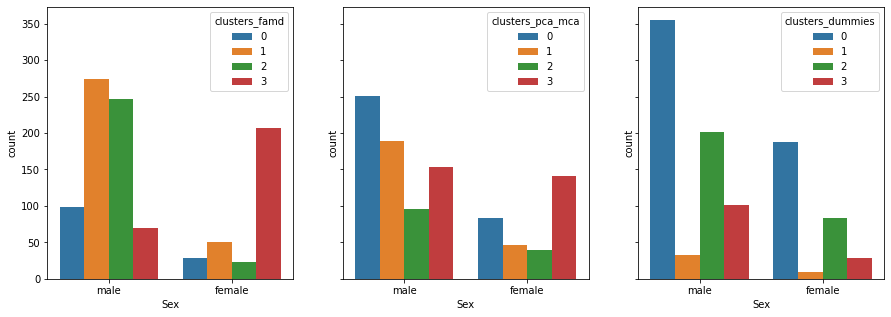

In [132]:
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(15, 5), ncols=3, sharex=True, sharey=True)
sn.countplot(x='Sex', hue='clusters_famd', data=dataset_clust,  ax=ax1)
sn.countplot(x='Sex', hue='clusters_pca_mca', data=dataset_clust,  ax=ax2)
sn.countplot(x='Sex', hue='clusters_dummies', data=dataset_clust,  ax=ax3)
plt.show()

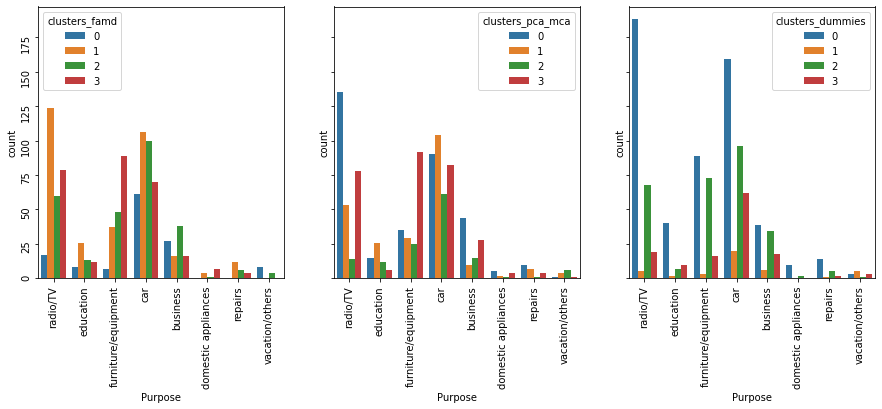

In [127]:
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(15, 5), ncols=3, sharex=True, sharey=True)
sn.countplot(x='Purpose', hue='clusters_famd', data=dataset_clust,  ax=ax1)
sn.countplot(x='Purpose', hue='clusters_pca_mca', data=dataset_clust,  ax=ax2)
sn.countplot(x='Purpose', hue='clusters_dummies', data=dataset_clust,  ax=ax3)
ax1.tick_params(labelrotation=90)
ax2.tick_params(labelrotation=90)
ax3.tick_params(labelrotation=90)
plt.show()

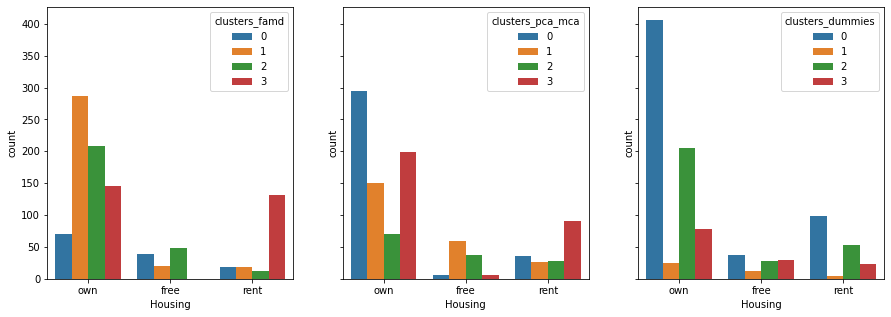

In [150]:
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(15, 5), ncols=3, sharex=True, sharey=True)
sn.countplot(x='Housing', hue='clusters_famd', data=dataset_clust,  ax=ax1)
sn.countplot(x='Housing', hue='clusters_pca_mca', data=dataset_clust,  ax=ax2)
sn.countplot(x='Housing', hue='clusters_dummies', data=dataset_clust,  ax=ax3)
plt.show()

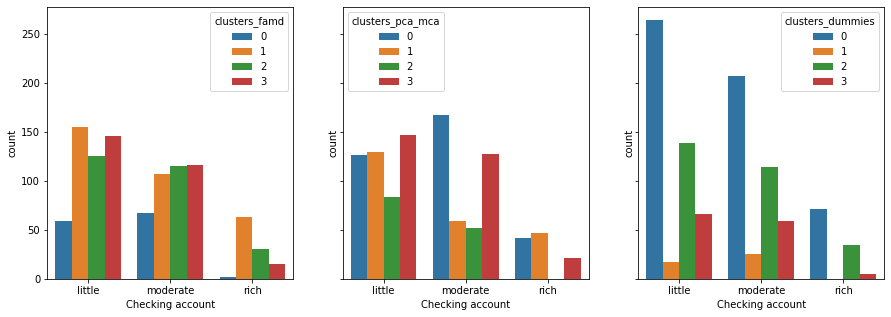

In [149]:
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(15, 5), ncols=3, sharex=True, sharey=True)
sn.countplot(x='Checking account', hue='clusters_famd', data=dataset_clust,  ax=ax1)
sn.countplot(x='Checking account', hue='clusters_pca_mca', data=dataset_clust,  ax=ax2)
sn.countplot(x='Checking account', hue='clusters_dummies', data=dataset_clust,  ax=ax3)
plt.show()

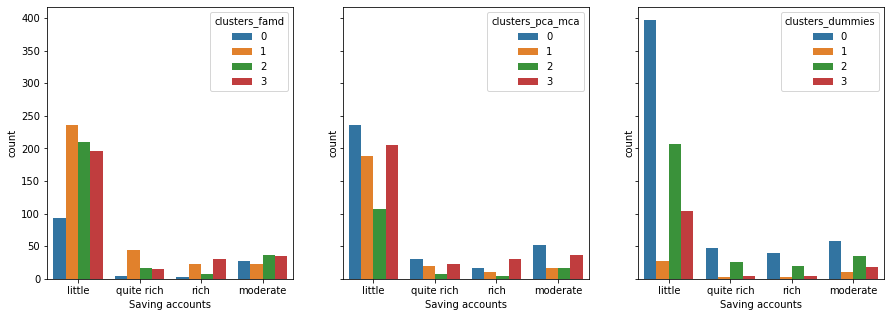

In [148]:
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(15, 5), ncols=3, sharex=True, sharey=True)
sn.countplot(x='Saving accounts', hue='clusters_famd', data=dataset_clust,  ax=ax1)
sn.countplot(x='Saving accounts', hue='clusters_pca_mca', data=dataset_clust,  ax=ax2)
sn.countplot(x='Saving accounts', hue='clusters_dummies', data=dataset_clust,  ax=ax3)
plt.show()

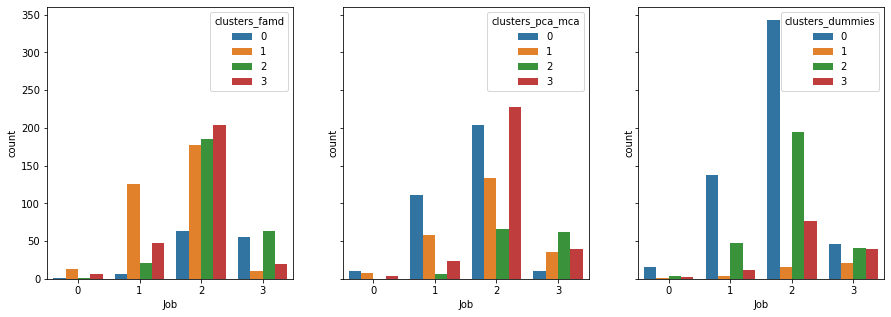

In [147]:
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(15, 5), ncols=3, sharex=True, sharey=True)
sn.countplot(x='Job', hue='clusters_famd', data=dataset_clust,  ax=ax1)
sn.countplot(x='Job', hue='clusters_pca_mca', data=dataset_clust,  ax=ax2)
sn.countplot(x='Job', hue='clusters_dummies', data=dataset_clust,  ax=ax3)

plt.show()

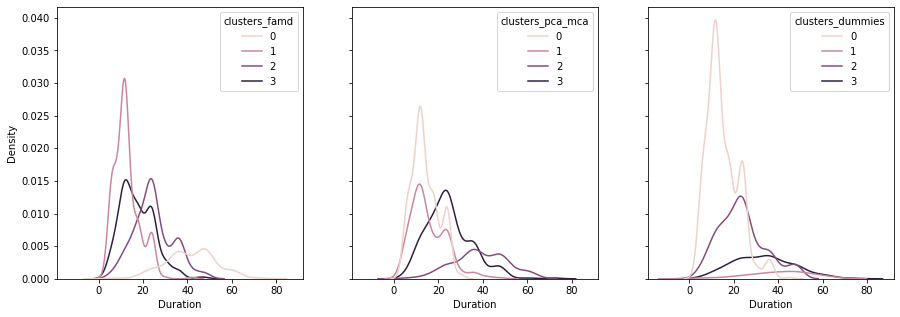

In [146]:
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(15, 5), ncols=3, sharex=True, sharey=True)
sn.kdeplot(x='Duration', hue='clusters_famd', data=dataset_clust, ax=ax1)
sn.kdeplot(x='Duration', hue='clusters_pca_mca', data=dataset_clust, ax=ax2)
sn.kdeplot(x='Duration', hue='clusters_dummies', data=dataset_clust, ax=ax3)
plt.show()

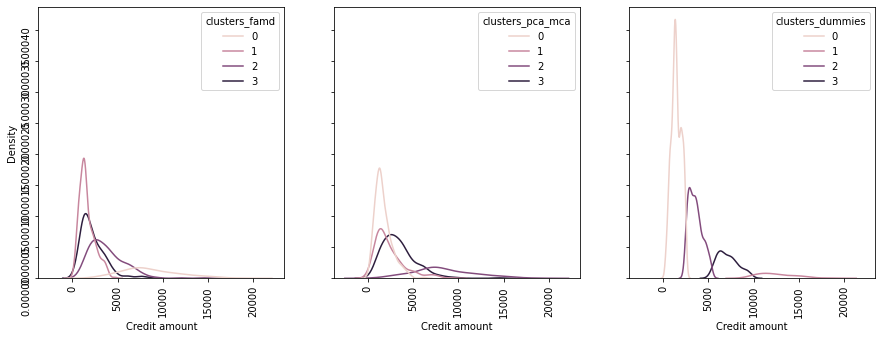

In [145]:
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(15, 5), ncols=3, sharex=True, sharey=True)
sn.kdeplot(x='Credit amount', hue='clusters_famd', data=dataset_clust, ax=ax1)
sn.kdeplot(x='Credit amount', hue='clusters_pca_mca', data=dataset_clust, ax=ax2)
sn.kdeplot(x='Credit amount', hue='clusters_dummies', data=dataset_clust, ax=ax3)
ax1.tick_params(labelrotation=90)
ax2.tick_params(labelrotation=90)
ax3.tick_params(labelrotation=90)
plt.show()

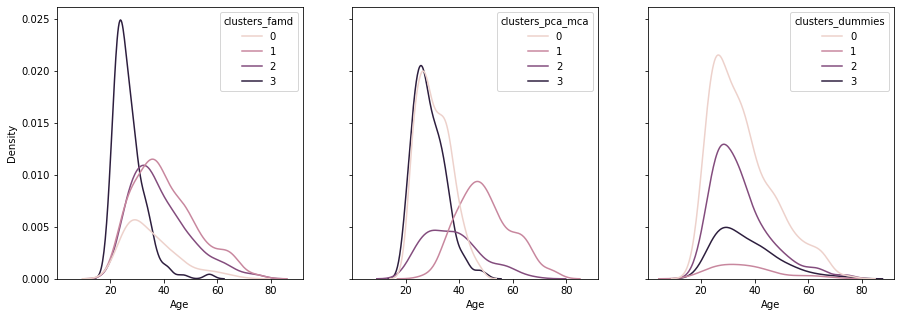

In [152]:
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(15, 5), ncols=3, sharex=True, sharey=True)
sn.kdeplot(x='Age', hue='clusters_famd', data=dataset_clust, ax=ax1)
sn.kdeplot(x='Age', hue='clusters_pca_mca', data=dataset_clust, ax=ax2)
sn.kdeplot(x='Age', hue='clusters_dummies', data=dataset_clust, ax=ax3)
plt.show()

**The following analysis is for the FAMD clustering**, which has very similar results to PCA+MCA. The method is similar for any of the three clusterings. The idea is look for characteristics of the individuals belonging to a certain cluster, through the lens of each feature.

### 7.4.1. Cluster 0

This first cluster seems to be characterised by clients who are mostly **men, between 25 and 45 years old**, with a **credit amount between 2000 and 8000**. As a result, the **duration** is **between 20 and 40 months**. They mostly have **type 2 and type 3 jobs**, **little saving acccounts** but a **little to moderate checking account**. 

### 7.4.2. Cluster 1



This second cluster seems to be characterised by clients who are mostly **men, between 30 and 55 years old**, with a **credit amount around 2000**. As a result, the **duration is short, less than 20 months**. They mostly have **type 1 and type 2 jobs**, but **little saving acccounts**. As for their **checking account, 45% are considered little, 33% are considered moderate and 22% are considered rich**. They are the group with **most home owners out of the four clusters**. 

### 7.4.3. Cluster 2


This third cluster seems to be characterised mostly by clients who are **young women aged between 20 and 30 years old**, with a **medium credit amount, mostly between 2000 and 4000**. As a result, the **duration is between 15 and 30 months**. They mostly have **type 2 jobs**, but **little saving acccounts**. As for their **checking accounts, around half are considered little, and the other half are considered rich**. The same goes for housing, **a little more than half of them are home owners and the other half are renting**. 

### 7.4.4. Cluster 3


This last cluster seems to be characterised mostly by clients who are **of all ages but mostly in their 30's**, with a **higher credit amount, mostly between 5000 and 15000**. As a result, the **duration is between 25 and 60 months**. They mostly have **type 2 and type 3 jobs**, but **little saving acccounts**. As for their **checking accounts, they are mostly moderate, and the rest is little**. As for housing, **45% own a home, 36% live for free, and 19% pay a rent**. 